#### 1. Data Analysis with SQL

In [69]:
df = pd.read_csv('student_admission_record.csv')

df.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24,Female,50,68.90,Quetta,Rejected
1,Aliya,17,Male,55,85.29,Karachi,Rejected
2,Rabia,20,Female,82,55.67,Lahore,Accepted
3,Kamran,18,Male,53,98.98,Multan,Rejected
4,Ahmed,21,Male,62,79.03,Karachi,Accepted


In [71]:
import psycopg2

In [140]:
# Connect to your postgres DB
conn = psycopg2.connect(
    dbname="final_project",
    user="postgres",
    password="2617",
    host="localhost",
    port="5432"
)

# Open a cursor to perform database operations
cur =  conn.cursor()

In [ ]:
# Retrieve specific data using SELECT statements with various

![select](select.png)

In [ ]:
# GROUP BY and aggreagation functions

![groupby](groupby.png)

![groupby2](groupby2.png)

![groupby3](groupby3.png)

![picture1](picture1.png)

![picture2](picture2.png)

![picture3](picture3.png)

![pictur4](picture4.png)

![picture5](picture5.png)

In [ ]:
# Implemenet subqueries and nested queries/window functions

![picture6](picture6.png)

![picture7](picture7.png)

![picture8](picture8.png)

![picture9](picture9.png)

![picture10](picture10.png)

![picture11](picture11.png)

#### 2. Python Integration with psycopg2

In [142]:
# Query the database
try:
    conn.rollback()
    cur.execute("SELECT * FROM admission;")
    rows = cur.fetchall()

    for row in rows:
        print(row)

except Exception as e:
    print("An error occurred:", e)
    conn.rollback()

('Shehroz', 24, 'Female', 50, Decimal('68.90'), 'Quetta', 'Rejected')
('Aliya', 17, 'Male', 55, Decimal('85.29'), 'Karachi', 'Rejected')
('Rabia', 20, 'Female', 82, Decimal('55.67'), 'Lahore', 'Accepted')
('Kamran', 18, 'Male', 53, Decimal('98.98'), 'Multan', 'Rejected')
('Ahmed', 21, 'Male', 62, Decimal('79.03'), 'Karachi', 'Accepted')
('Fareeha', 22, 'Male', 86, Decimal('50.77'), 'Islamabad', 'Rejected')
('Saim', 19, 'Male', 84, Decimal('97.19'), 'Peshawar', 'Rejected')
('Uzma', 17, 'Female', 96, Decimal('93.34'), 'Karachi', 'Rejected')
('Maryam', 19, 'Female', 74, Decimal('70.26'), 'Lahore', 'Accepted')
('Waqar', 22, 'Male', 77, Decimal('94.02'), 'Peshawar', 'Rejected')
('Kamran', 18, 'Male', 53, Decimal('98.98'), 'Multan', 'Rejected')
('Imran', 20, 'Female', 76, Decimal('69.27'), 'Peshawar', 'Rejected')
('Anum', 20, 'Female', 96, Decimal('62.44'), 'Quetta', 'Rejected')
('Bushra', 17, 'Male', 89, Decimal('78.57'), 'Islamabad', 'Accepted')
('Ali', 17, 'Male', 74, Decimal('56.38'), 'R

#### 3. Data Visualization

In [144]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.DataFrame(rows, columns=['Name', 'Age', 'Gender', 'Admission Test Score', 'High School Percentage', 'City', 'Admission Status'])

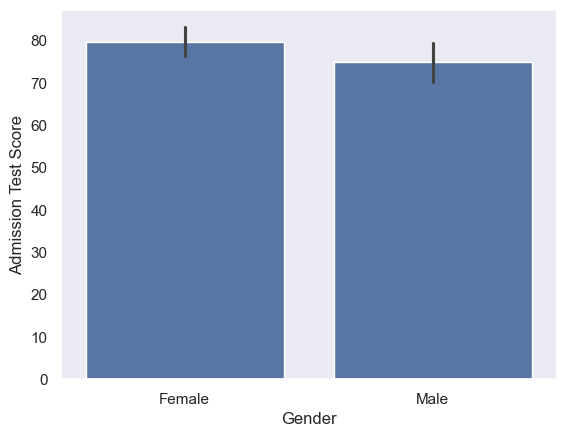

In [161]:
sns.barplot(x='Gender', y='Admission Test Score', data=data)
sns.set_palette("pastel")


plt.show()

### The chart compares the average admission test scores between genders. Female has a higher average score.

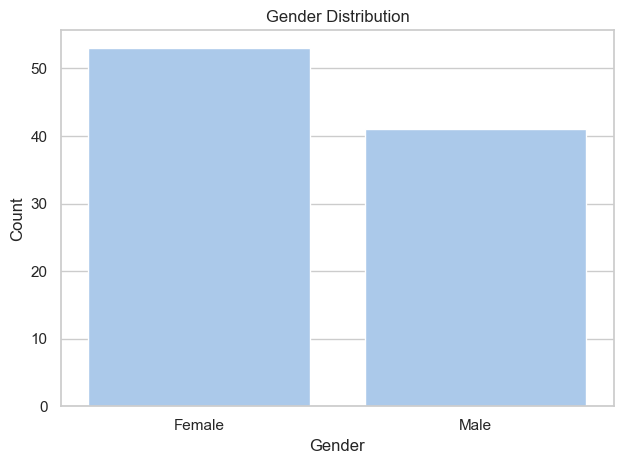

In [165]:
sns.set_theme(style="whitegrid", palette="pastel")

sns.countplot(x='Gender', data=data)

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### The chart helps identify trends or disparities in admissions between genders. Female has a higher proportion of admitted students.

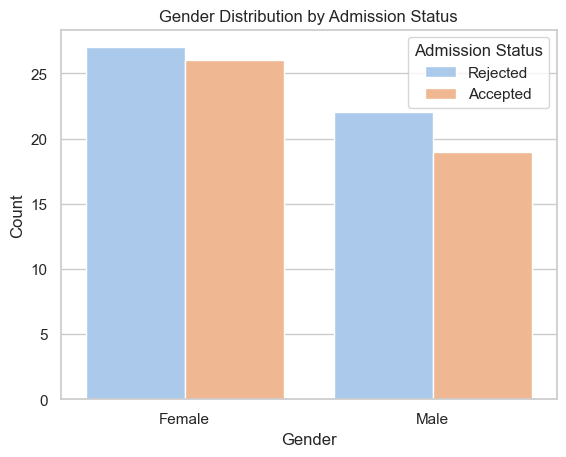

In [171]:
sns.set_theme(style="whitegrid", palette="pastel")

sns.countplot(x='Gender', hue='Admission Status', data=data)

plt.title('Gender Distribution by Admission Status')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

### Female has a highter number of admitted students. There is no significant difference beween rejected students and accepted students but gender.

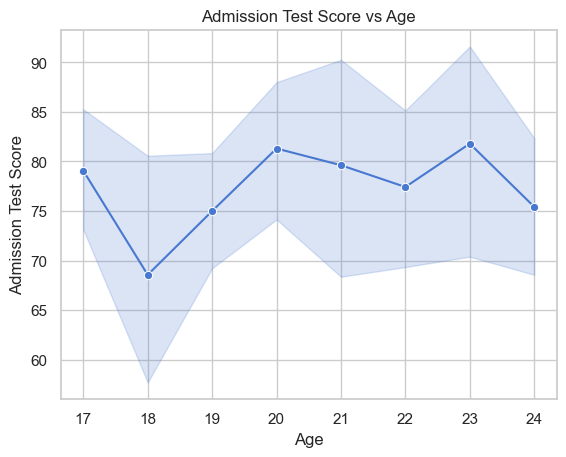

In [177]:
sns.set_theme(style="whitegrid", palette="muted")

sns.lineplot(x='Age', y='Admission Test Score', data=data, marker='o')

plt.title('Admission Test Score vs Age')
plt.xlabel('Age')
plt.ylabel('Admission Test Score')

plt.show()

### Older individuals tend to perform better than younger individuals. 18 years old students tend to have lower admission test score compared to other age.

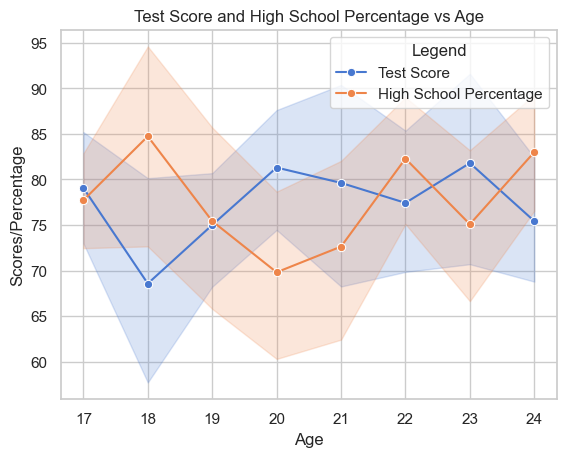

In [179]:
sns.set_theme(style="whitegrid", palette="muted")

sns.lineplot(x='Age', y='Admission Test Score', data=data, marker='o', label='Test Score')
sns.lineplot(x='Age', y='High School Percentage', data=data, marker='o', label='High School Percentage')

plt.title('Test Score and High School Percentage vs Age')
plt.xlabel('Age')
plt.ylabel('Scores/Percentage')

plt.legend(title='Legend')

### The lines diverge, and this suggests the two metrics are influenced by different factors and may not be strongly correlated.

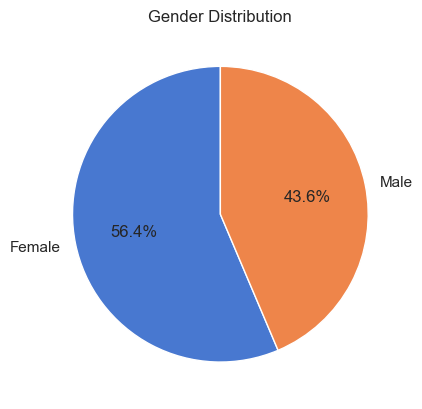

In [185]:
gender_counts = data['Gender'].value_counts()

sns.set_theme(style="whitegrid", palette="muted")

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

plt.show()

### The chart shows nearly equal-sized slices so the gender representation in the data is balanced.